In [1]:
import os
import netCDF4
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature

from matplotlib.cm import get_cmap
from matplotlib.collections import LineCollection
from matplotlib.path import Path
import matplotlib.path as mpath
import matplotlib.patches as patches
from matplotlib.image import imread
from matplotlib.colors import ListedColormap, BoundaryNorm

from scipy import stats

In [2]:
#################
# Load data
#################
#Path
#os.chdir('D:\\Bigfiles\\MICROAIRPOLAR\\Climatologia')
filename = 'ERA5_t2m_1950-2020.nc'

#Load netcdf
ncdf = netCDF4.Dataset(filename)

#Get dimensions
lons = ncdf.variables['longitude'][:]
lats = ncdf.variables['latitude'][:]
times = ncdf.variables['time'][:]

#Calculate datetime
dtimes = np.empty(len(times), dtype='datetime64[h]')
for i,t in enumerate(times):
    dtimes[i] = np.datetime64('1900-01-01') + np.timedelta64(np.int64(t),'h')
dtimes = dtimes.astype('datetime64')

#Get variables
t2m = ncdf.variables['t2m'][:,:,:]-273.15

In [3]:
#################
# Get latitude of isozero for each longitude
#################

lat0 = np.empty((np.size(dtimes),np.size(lons)))

for j,dtime in enumerate(dtimes[:-1]):
    print(dtime)
    #print(j)
    for i,lon in enumerate(lons):
        ixs = [np.where(t2m[j,:,i] > 0)[0][-1],np.where(t2m[j,:,i] > 0)[0][-1]+1]
        #print(ixs)
        lats_ixs = lats[ixs]
        T_ixs = [t2m[j,ixs[0],i], t2m[j,ixs[1],i]]
        lat0[j,i] = np.interp(0, np.flipud(T_ixs), np.flipud(lats_ixs))


1950-01-01T00
1950-02-01T00
1950-03-01T00
1950-04-01T00
1950-05-01T00
1950-06-01T00
1950-07-01T00
1950-08-01T00
1950-09-01T00
1950-10-01T00
1950-11-01T00
1950-12-01T00
1951-01-01T00
1951-02-01T00
1951-03-01T00
1951-04-01T00
1951-05-01T00
1951-06-01T00
1951-07-01T00
1951-08-01T00
1951-09-01T00
1951-10-01T00
1951-11-01T00
1951-12-01T00
1952-01-01T00
1952-02-01T00
1952-03-01T00
1952-04-01T00
1952-05-01T00
1952-06-01T00
1952-07-01T00
1952-08-01T00
1952-09-01T00
1952-10-01T00
1952-11-01T00
1952-12-01T00
1953-01-01T00
1953-02-01T00
1953-03-01T00
1953-04-01T00
1953-05-01T00
1953-06-01T00
1953-07-01T00
1953-08-01T00
1953-09-01T00
1953-10-01T00
1953-11-01T00
1953-12-01T00
1954-01-01T00
1954-02-01T00
1954-03-01T00
1954-04-01T00
1954-05-01T00
1954-06-01T00
1954-07-01T00
1954-08-01T00
1954-09-01T00
1954-10-01T00
1954-11-01T00
1954-12-01T00
1955-01-01T00
1955-02-01T00
1955-03-01T00
1955-04-01T00
1955-05-01T00
1955-06-01T00
1955-07-01T00
1955-08-01T00
1955-09-01T00
1955-10-01T00
1955-11-01T00
1955-1

1998-12-01T00
1999-01-01T00
1999-02-01T00
1999-03-01T00
1999-04-01T00
1999-05-01T00
1999-06-01T00
1999-07-01T00
1999-08-01T00
1999-09-01T00
1999-10-01T00
1999-11-01T00
1999-12-01T00
2000-01-01T00
2000-02-01T00
2000-03-01T00
2000-04-01T00
2000-05-01T00
2000-06-01T00
2000-07-01T00
2000-08-01T00
2000-09-01T00
2000-10-01T00
2000-11-01T00
2000-12-01T00
2001-01-01T00
2001-02-01T00
2001-03-01T00
2001-04-01T00
2001-05-01T00
2001-06-01T00
2001-07-01T00
2001-08-01T00
2001-09-01T00
2001-10-01T00
2001-11-01T00
2001-12-01T00
2002-01-01T00
2002-02-01T00
2002-03-01T00
2002-04-01T00
2002-05-01T00
2002-06-01T00
2002-07-01T00
2002-08-01T00
2002-09-01T00
2002-10-01T00
2002-11-01T00
2002-12-01T00
2003-01-01T00
2003-02-01T00
2003-03-01T00
2003-04-01T00
2003-05-01T00
2003-06-01T00
2003-07-01T00
2003-08-01T00
2003-09-01T00
2003-10-01T00
2003-11-01T00
2003-12-01T00
2004-01-01T00
2004-02-01T00
2004-03-01T00
2004-04-01T00
2004-05-01T00
2004-06-01T00
2004-07-01T00
2004-08-01T00
2004-09-01T00
2004-10-01T00
2004-1

In [4]:
years = np.arange(1950,2021)
lat0_ANN = np.empty((np.size(years),np.size(lons)))
lat0_MAM = np.empty((np.size(years),np.size(lons)))
lat0_JJA = np.empty((np.size(years),np.size(lons)))
lat0_SON = np.empty((np.size(years),np.size(lons)))
lat0_DJF = np.empty((np.size(years),np.size(lons)))
for i,year in enumerate(np.arange(1950,2021)):
    ix = (year - 1950)*12
    lat0_ANN[i] = np.mean(lat0[ix:ix+12,:], axis=0)
    lat0_MAM[i] = np.mean(lat0[ix+2:ix+2+3,:], axis=0)
    lat0_JJA[i] = np.mean(lat0[ix+5:ix+5+3,:], axis=0)
    lat0_SON[i] = np.mean(lat0[ix+8:ix+8+3,:], axis=0)
    lat0_DJF[i] = np.mean(lat0[ix+11:ix+11+3,:], axis=0)
    
#lat0_ANN = lat0_ANN[:-1]
#lat0_DJF = lat0_DJF[:-1]

In [5]:
lat0_DJF

array([[-65.08947719, -65.11029371, -65.13118487, ..., -65.01196604,
        -65.03608189, -65.06359813],
       [-65.76554081, -65.80297292, -65.83224256, ..., -65.64913034,
        -65.68912061, -65.72764433],
       [-65.18909034, -65.2014268 , -65.21416848, ..., -65.12641406,
        -65.14996801, -65.169843  ],
       ...,
       [-65.95468716, -65.96917871, -65.98675033, ..., -65.8987761 ,
        -65.91799856, -65.93527577],
       [-66.86600778, -66.86434927, -66.86386163, ..., -66.85403423,
        -66.85480709, -66.85711509],
       [-66.38192011, -66.40972559, -66.43263307, ..., -66.29420216,
        -66.31803913, -66.34435845]])

In [6]:
#################
# Load data SAM
#################
#Path
#os.chdir('D:\\Bigfiles\\MICROAIRPOLAR\\Climatologia')
filename = 'SAM_Annual_Seasonal.csv'

df_SAM = pd.read_csv(filename, delimiter='\s+', index_col='YEAR')

#Get values
SAM_YEAR = df_SAM.index.values
SAM_ANN = df_SAM['ANN'].values
SAM_DJF = df_SAM['SUM'].values
SAM_MAM = df_SAM['AUT'].values
SAM_JJA = df_SAM['WIN'].values
SAM_SON = df_SAM['SPR'].values

#Get trends
slope_SAM_ANN, intercept_SAM_ANN, r_value_SAM_ANN, p_value_SAM_ANN, std_err_SAM_ANN = stats.linregress(SAM_YEAR, SAM_ANN)
slope_SAM_DJF, intercept_SAM_DJF, r_value_SAM_DJF, p_value_SAM_DJF, std_err_SAM_DJF = stats.linregress(SAM_YEAR, SAM_DJF)
slope_SAM_MAM, intercept_SAM_MAM, r_value_SAM_MAM, p_value_SAM_MAM, std_err_SAM_MAM = stats.linregress(SAM_YEAR, SAM_MAM)
slope_SAM_JJA, intercept_SAM_JJA, r_value_SAM_JJA, p_value_SAM_JJA, std_err_SAM_JJA = stats.linregress(SAM_YEAR, SAM_JJA)
slope_SAM_SON, intercept_SAM_SON, r_value_SAM_SON, p_value_SAM_SON, std_err_SAM_SON = stats.linregress(SAM_YEAR, SAM_SON)

#Detrend
SAM_ANN_detr = SAM_ANN - slope_SAM_ANN*(SAM_YEAR-SAM_YEAR[0])
SAM_DJF_detr = SAM_DJF - slope_SAM_DJF*(SAM_YEAR-SAM_YEAR[0])
SAM_MAM_detr = SAM_MAM - slope_SAM_MAM*(SAM_YEAR-SAM_YEAR[0])
SAM_JJA_detr = SAM_JJA - slope_SAM_JJA*(SAM_YEAR-SAM_YEAR[0])
SAM_SON_detr = SAM_SON - slope_SAM_SON*(SAM_YEAR-SAM_YEAR[0])

In [7]:
#################
# Claculate iso0 retreat linear regression from 1957 to 2020
#################
slope_ANN = np.empty(np.size(lons))
intercept_ANN = np.empty(np.size(lons))
r_value_ANN = np.empty(np.size(lons))
p_value_ANN = np.empty(np.size(lons))
std_err_ANN = np.empty(np.size(lons))
slope_DJF = np.empty(np.size(lons))
intercept_DJF = np.empty(np.size(lons))
r_value_DJF = np.empty(np.size(lons))
p_value_DJF = np.empty(np.size(lons))
std_err_DJF = np.empty(np.size(lons))
slope_MAM = np.empty(np.size(lons))
intercept_MAM = np.empty(np.size(lons))
r_value_MAM = np.empty(np.size(lons))
p_value_MAM = np.empty(np.size(lons))
std_err_MAM = np.empty(np.size(lons))
slope_JJA = np.empty(np.size(lons))
intercept_JJA = np.empty(np.size(lons))
r_value_JJA = np.empty(np.size(lons))
p_value_JJA = np.empty(np.size(lons))
std_err_JJA = np.empty(np.size(lons))
slope_SON = np.empty(np.size(lons))
intercept_SON = np.empty(np.size(lons))
r_value_SON = np.empty(np.size(lons))
p_value_SON = np.empty(np.size(lons))
std_err_SON = np.empty(np.size(lons))

for i,lon in enumerate(lons):
    slope_ANN[i], intercept_ANN[i], r_value_ANN[i], p_value_ANN[i], std_err_ANN[i] = stats.linregress(years[7:], lat0_ANN[7:,i])
    slope_DJF[i], intercept_DJF[i], r_value_DJF[i], p_value_DJF[i], std_err_DJF[i] = stats.linregress(years[7:], lat0_DJF[7:,i])
    slope_MAM[i], intercept_MAM[i], r_value_MAM[i], p_value_MAM[i], std_err_MAM[i] = stats.linregress(years[7:], lat0_MAM[7:,i])
    slope_JJA[i], intercept_JJA[i], r_value_JJA[i], p_value_JJA[i], std_err_JJA[i] = stats.linregress(years[7:], lat0_JJA[7:,i])
    slope_SON[i], intercept_SON[i], r_value_SON[i], p_value_SON[i], std_err_SON[i] = stats.linregress(years[7:], lat0_SON[7:,i])
    
#################
# Detrend Zero isotherm latitude from 1957 to 2020
#################
#lat
lat0_ANN_detr = np.empty([np.size(years[7:]),np.size(lons)])
lat0_DJF_detr = np.empty([np.size(years[7:]),np.size(lons)])
lat0_MAM_detr = np.empty([np.size(years[7:]),np.size(lons)])
lat0_JJA_detr = np.empty([np.size(years[7:]),np.size(lons)])
lat0_SON_detr = np.empty([np.size(years[7:]),np.size(lons)])

for i,lon in enumerate(lons):
    lat0_ANN_detr[:,i] = lat0_ANN[7:,i] - slope_ANN[i] * (years[7:] - years[7])
    lat0_DJF_detr[:,i] = lat0_DJF[7:,i] - slope_DJF[i] * (years[7:] - years[7])
    lat0_MAM_detr[:,i] = lat0_MAM[7:,i] - slope_MAM[i] * (years[7:] - years[7])
    lat0_JJA_detr[:,i] = lat0_JJA[7:,i] - slope_JJA[i] * (years[7:] - years[7])
    lat0_SON_detr[:,i] = lat0_SON[7:,i] - slope_SON[i] * (years[7:] - years[7])
   
    
#################
# Correlation detrended ZIL vs. SAM

#################
corr_SAM_ANN = np.empty(np.size(lons))
corr_SAM_DJF = np.empty(np.size(lons))
corr_SAM_MAM = np.empty(np.size(lons))
corr_SAM_JJA = np.empty(np.size(lons))
corr_SAM_SON = np.empty(np.size(lons))
pval_corr_SAM_DJF = np.empty(np.size(lons))
pval_corr_SAM_MAM = np.empty(np.size(lons))
pval_corr_SAM_JJA = np.empty(np.size(lons))
pval_corr_SAM_SON = np.empty(np.size(lons))
pval_corr_SAM_ANN = np.empty(np.size(lons))

for i,lon in enumerate(lons):
    corr_SAM_ANN[i], pval_corr_SAM_ANN[i] = stats.pearsonr(lat0_ANN_detr[:,i], SAM_ANN_detr[:])
    corr_SAM_DJF[i], pval_corr_SAM_DJF[i] = stats.pearsonr(lat0_DJF_detr[:,i], SAM_DJF_detr[:])
    corr_SAM_MAM[i], pval_corr_SAM_MAM[i] = stats.pearsonr(lat0_MAM_detr[:,i], SAM_MAM_detr[:])
    corr_SAM_JJA[i], pval_corr_SAM_JJA[i] = stats.pearsonr(lat0_JJA_detr[:,i], SAM_JJA_detr[:])
    corr_SAM_SON[i], pval_corr_SAM_SON[i] = stats.pearsonr(lat0_SON_detr[:,i], SAM_SON_detr[:])
    
#################
# Congruence analysis SAM
#################
SAM_congr_ANN = np.empty(np.size(lons))
SAM_congr_DJF = np.empty(np.size(lons))
SAM_congr_MAM = np.empty(np.size(lons))
SAM_congr_JJA = np.empty(np.size(lons))
SAM_congr_SON = np.empty(np.size(lons))

for i,lon in enumerate(lons):
    SAM_congr_ANN[i] = corr_SAM_ANN[i] * slope_SAM_ANN
    SAM_congr_DJF[i] = corr_SAM_DJF[i] * slope_SAM_ANN
    SAM_congr_MAM[i] = corr_SAM_MAM[i] * slope_SAM_ANN
    SAM_congr_JJA[i] = corr_SAM_JJA[i] * slope_SAM_ANN
    SAM_congr_SON[i] = corr_SAM_SON[i] * slope_SAM_ANN
    
#################
# ZIL Backgraund
#################
background_slope_ANN = np.empty(np.size(lons))
background_slope_DJF = np.empty(np.size(lons))
background_slope_MAM = np.empty(np.size(lons))
background_slope_JJA = np.empty(np.size(lons))
background_slope_SON = np.empty(np.size(lons))


for i,lon in enumerate(lons):
    background_slope_ANN[i] = slope_ANN[i] - SAM_congr_ANN[i]
    background_slope_DJF[i] = slope_DJF[i] - SAM_congr_DJF[i]
    background_slope_MAM[i] = slope_MAM[i] - SAM_congr_MAM[i]
    background_slope_JJA[i] = slope_JJA[i] - SAM_congr_JJA[i]
    background_slope_SON[i] = slope_SON[i] - SAM_congr_SON[i]

lat0_ANN_bg = np.empty([np.size(years[7:]),np.size(lons)])
lat0_DJF_bg = np.empty([np.size(years[7:]),np.size(lons)])
lat0_MAM_bg = np.empty([np.size(years[7:]),np.size(lons)])
lat0_JJA_bg = np.empty([np.size(years[7:]),np.size(lons)])
lat0_SON_bg = np.empty([np.size(years[7:]),np.size(lons)])

for i,lon in enumerate(lons):
    lat0_ANN_bg[:,i] = lat0_ANN[7:,i] - (SAM_congr_ANN[i]) * (years[7:] - years[7])
    lat0_DJF_bg[:,i] = lat0_DJF[7:,i] - (SAM_congr_DJF[i]) * (years[7:] - years[7])
    lat0_MAM_bg[:,i] = lat0_MAM[7:,i] - (SAM_congr_MAM[i]) * (years[7:] - years[7])
    lat0_JJA_bg[:,i] = lat0_JJA[7:,i] - (SAM_congr_JJA[i]) * (years[7:] - years[7])
    lat0_SON_bg[:,i] = lat0_SON[7:,i] - (SAM_congr_SON[i]) * (years[7:] - years[7])

slope_ANN_bg = np.empty(np.size(lons))
intercept_ANN_bg = np.empty(np.size(lons))
r_value_ANN_bg = np.empty(np.size(lons))
p_value_ANN_bg = np.empty(np.size(lons))
std_err_ANN_bg = np.empty(np.size(lons))
slope_DJF_bg = np.empty(np.size(lons))
intercept_DJF_bg = np.empty(np.size(lons))
r_value_DJF_bg = np.empty(np.size(lons))
p_value_DJF_bg = np.empty(np.size(lons))
std_err_DJF_bg = np.empty(np.size(lons))
slope_MAM_bg = np.empty(np.size(lons))
intercept_MAM_bg = np.empty(np.size(lons))
r_value_MAM_bg = np.empty(np.size(lons))
p_value_MAM_bg = np.empty(np.size(lons))
std_err_MAM_bg = np.empty(np.size(lons))
slope_JJA_bg = np.empty(np.size(lons))
intercept_JJA_bg = np.empty(np.size(lons))
r_value_JJA_bg = np.empty(np.size(lons))
p_value_JJA_bg = np.empty(np.size(lons))
std_err_JJA_bg = np.empty(np.size(lons))
slope_SON_bg = np.empty(np.size(lons))
intercept_SON_bg = np.empty(np.size(lons))
r_value_SON_bg = np.empty(np.size(lons))
p_value_SON_bg = np.empty(np.size(lons))
std_err_SON_bg = np.empty(np.size(lons))

for i,lon in enumerate(lons):
    slope_ANN_bg[i], intercept_ANN_bg[i], r_value_ANN_bg[i], p_value_ANN_bg[i], std_err_ANN_bg[i] = stats.linregress(years[7:], lat0_ANN_bg[:,i])
    slope_DJF_bg[i], intercept_DJF_bg[i], r_value_DJF_bg[i], p_value_DJF_bg[i], std_err_DJF_bg[i] = stats.linregress(years[7:], lat0_DJF_bg[:,i])
    slope_MAM_bg[i], intercept_MAM_bg[i], r_value_MAM_bg[i], p_value_MAM_bg[i], std_err_MAM_bg[i] = stats.linregress(years[7:], lat0_MAM_bg[:,i])
    slope_JJA_bg[i], intercept_JJA_bg[i], r_value_JJA_bg[i], p_value_JJA_bg[i], std_err_JJA_bg[i] = stats.linregress(years[7:], lat0_JJA_bg[:,i])
    slope_SON_bg[i], intercept_SON_bg[i], r_value_SON_bg[i], p_value_SON_bg[i], std_err_SON_bg[i] = stats.linregress(years[7:], lat0_SON_bg[:,i])


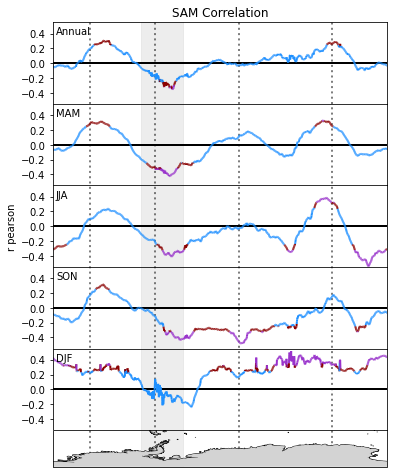

In [8]:
#################
# Plot iso0 congruence retreat linear regression
#################
#Figure and axis
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'wspace': 0.08}, figsize=(6,9), facecolor='white')

#############################  MAP  ###############################
ax6 = plt.subplot(6,1,6,projection=ccrs.PlateCarree(), sharex=ax1)
ax6.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())

land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='none',
                                        facecolor='LightGray')
ax6.coastlines(resolution='50m', facecolor='gray')
ax6.add_feature(land_50m)

##Plot Parameters
#Colors
cmap = ListedColormap(['DarkOrchid','DarkRed', 'DodgerBlue'])
norm = BoundaryNorm([0, 0.01, 0.05, 1], cmap.N)

######## Bellinghausen & AP ##############
#ANN
points_ANN = np.array([lons, corr_SAM_ANN]).T.reshape(-1, 1, 2)
segments_ANN = np.concatenate([points_ANN[:-1], points_ANN[1:]], axis=1)
lc_ANN = LineCollection(segments_ANN, cmap=cmap, norm=norm)
lc_ANN.set_array(pval_corr_SAM_ANN)
lc_ANN.set_linewidth(2)

#MAM
points_MAM = np.array([lons, corr_SAM_MAM]).T.reshape(-1, 1, 2)
segments_MAM = np.concatenate([points_MAM[:-1], points_MAM[1:]], axis=1)
lc_MAM = LineCollection(segments_MAM, cmap=cmap, norm=norm)
lc_MAM.set_array(pval_corr_SAM_MAM)
lc_MAM.set_linewidth(2)

#JJA
points_JJA = np.array([lons, corr_SAM_JJA]).T.reshape(-1, 1, 2)
segments_JJA = np.concatenate([points_JJA[:-1], points_JJA[1:]], axis=1)
lc_JJA = LineCollection(segments_JJA, cmap=cmap, norm=norm)
lc_JJA.set_array(pval_corr_SAM_JJA)
lc_JJA.set_linewidth(2)

#SON
points_SON = np.array([lons, corr_SAM_SON]).T.reshape(-1, 1, 2)
segments_SON = np.concatenate([points_SON[:-1], points_SON[1:]], axis=1)
lc_SON = LineCollection(segments_SON, cmap=cmap, norm=norm)
lc_SON.set_array(pval_corr_SAM_SON)
lc_SON.set_linewidth(2)

#DJF
points_DJF = np.array([lons, corr_SAM_DJF]).T.reshape(-1, 1, 2)
segments_DJF = np.concatenate([points_DJF[:-1], points_DJF[1:]], axis=1)
lc_DJF = LineCollection(segments_DJF, cmap=cmap, norm=norm)
lc_DJF.set_array(pval_corr_SAM_DJF)
lc_DJF.set_linewidth(2)

#Plot collection of lines
ax1.add_collection(lc_ANN)
ax2.add_collection(lc_MAM)
ax3.add_collection(lc_JJA)
ax4.add_collection(lc_SON)
ax5.add_collection(lc_DJF)

##Add extras
#zero horizontal
for ax in (ax1, ax2, ax3, ax4, ax5):
    ax.set_xlim(-180, 180)
    ax.set_ylim(-.55, .55)
    ax.set_yticks([-.4,-.2,0,.2,.4])

#vertical reference lines
for ax in (ax1, ax2, ax3, ax4, ax5, ax6):
    ax.plot([-200,200],[0,0], 'k-', linewidth=2, alpha=1, zorder=-1)
    #ax.plot([-85,-85],[-100,100], 'k-', linewidth=2, alpha=.5, zorder=-1)
    #ax.plot([-40,-40],[-100,100], 'k-', linewidth=2, alpha=.5, zorder=-1)
    ax.fill_between([-85,-40],-100,100, color='LightGray', alpha=.4, zorder=-2)
    
    ax.plot([-140,-140],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([-70,-70],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([20,20],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([120,120],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)


#Season labels
ax1.annotate('Annual', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax2.annotate('MAM', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax3.annotate('JJA', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax4.annotate('SON', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax5.annotate('DJF', xy=(.01, .85), xycoords='axes fraction', zorder=2)

#Title
ax1.title.set_text('SAM Correlation')

ax3.set_ylabel('r pearson')

plt.subplots_adjust(wspace=0.08, hspace=0)

for ax in ([ax6]):
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, 
                      chartBox.y0+0.035,
                      chartBox.width,
                      chartBox.height])
#plt.xlim(-180, 180)
#plt.ylim(-0.6, 0.6)
plt.show()

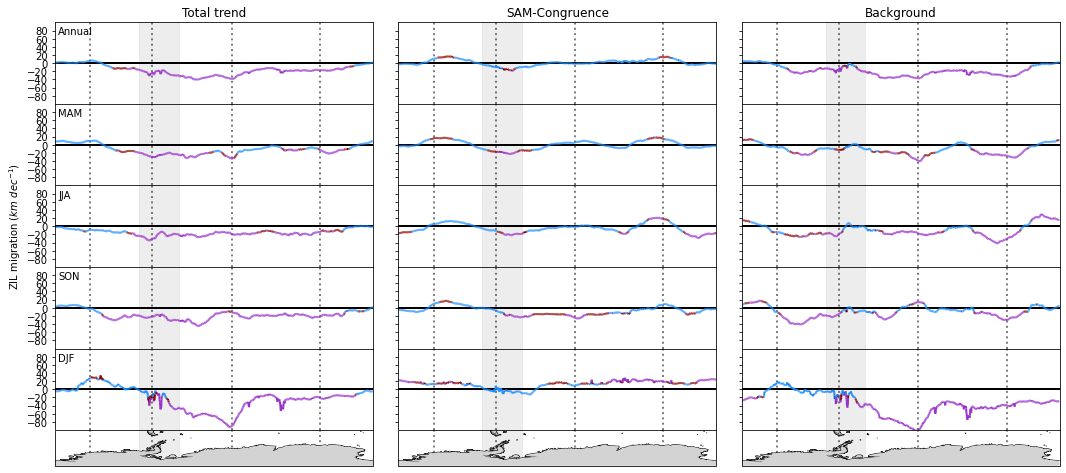

In [9]:
#################
# Plot iso0 congruence retreat linear regression
#################
#Figure and axis
fig, ([ax1, ax2, ax3], [ax4, ax5, ax6], [ax7, ax8, ax9], [ax10, ax11, ax12], [ax13, ax14, ax15], [ax16, ax17, ax18]) = plt.subplots(6, 3, sharex=True, sharey=False, gridspec_kw={'hspace': 0, 'wspace': 0.08}, figsize=(18,9), facecolor='white')

#############################  MAP  ###############################
ax16 = plt.subplot(6,3,16,projection=ccrs.PlateCarree(), sharex=ax1)
ax17 = plt.subplot(6,3,17,projection=ccrs.PlateCarree(), sharex=ax1)
ax18 = plt.subplot(6,3,18,projection=ccrs.PlateCarree(), sharex=ax1)

ax16.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax17.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
ax18.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())

land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='none',
                                        facecolor='LightGray')
ax16.coastlines(resolution='50m', facecolor='gray')
ax16.add_feature(land_50m)
ax17.coastlines(resolution='50m', facecolor='gray')
ax17.add_feature(land_50m)
ax18.coastlines(resolution='50m', facecolor='gray')
ax18.add_feature(land_50m)

##Plot Parameters
#Colors
cmap = ListedColormap(['DarkOrchid','DarkRed', 'DodgerBlue'])
norm = BoundaryNorm([0, 0.01, 0.05, 1], cmap.N)

######## Bellinghausen & AP ##############
#ANN
points_ANN = np.array([lons, slope_ANN*10*111]).T.reshape(-1, 1, 2)
segments_ANN = np.concatenate([points_ANN[:-1], points_ANN[1:]], axis=1)
lc_ANN = LineCollection(segments_ANN, cmap=cmap, norm=norm)
lc_ANN.set_array(p_value_ANN)
lc_ANN.set_linewidth(2)

points_ANN = np.array([lons, SAM_congr_ANN*10*111]).T.reshape(-1, 1, 2)
segments_ANN = np.concatenate([points_ANN[:-1], points_ANN[1:]], axis=1)
lc_SAM_congr_ANN = LineCollection(segments_ANN, cmap=cmap, norm=norm)
lc_SAM_congr_ANN.set_array(pval_corr_SAM_ANN)
lc_SAM_congr_ANN.set_linewidth(2)

points_ANN = np.array([lons, background_slope_ANN*10*111]).T.reshape(-1, 1, 2)
segments_ANN = np.concatenate([points_ANN[:-1], points_ANN[1:]], axis=1)
lc_bg_ANN = LineCollection(segments_ANN, cmap=cmap, norm=norm)
lc_bg_ANN.set_array(p_value_ANN_bg)
lc_bg_ANN.set_linewidth(2)

#MAM
points_MAM = np.array([lons, slope_MAM*10*111]).T.reshape(-1, 1, 2)
segments_MAM = np.concatenate([points_MAM[:-1], points_MAM[1:]], axis=1)
lc_MAM = LineCollection(segments_MAM, cmap=cmap, norm=norm)
lc_MAM.set_array(p_value_MAM)
lc_MAM.set_linewidth(2)

points_MAM = np.array([lons, SAM_congr_MAM*10*111]).T.reshape(-1, 1, 2)
segments_MAM = np.concatenate([points_MAM[:-1], points_MAM[1:]], axis=1)
lc_SAM_congr_MAM = LineCollection(segments_MAM, cmap=cmap, norm=norm)
lc_SAM_congr_MAM.set_array(pval_corr_SAM_MAM)
lc_SAM_congr_MAM.set_linewidth(2)

points_MAM = np.array([lons, background_slope_MAM*10*111]).T.reshape(-1, 1, 2)
segments_MAM = np.concatenate([points_MAM[:-1], points_MAM[1:]], axis=1)
lc_bg_MAM = LineCollection(segments_MAM, cmap=cmap, norm=norm)
lc_bg_MAM.set_array(p_value_MAM_bg)
lc_bg_MAM.set_linewidth(2)

#JJA
points_JJA = np.array([lons, slope_JJA*10*111]).T.reshape(-1, 1, 2)
segments_JJA = np.concatenate([points_JJA[:-1], points_JJA[1:]], axis=1)
lc_JJA = LineCollection(segments_JJA, cmap=cmap, norm=norm)
lc_JJA.set_array(p_value_JJA)
lc_JJA.set_linewidth(2)

points_JJA = np.array([lons, SAM_congr_JJA*10*111]).T.reshape(-1, 1, 2)
segments_JJA = np.concatenate([points_JJA[:-1], points_JJA[1:]], axis=1)
lc_SAM_congr_JJA = LineCollection(segments_JJA, cmap=cmap, norm=norm)
lc_SAM_congr_JJA.set_array(pval_corr_SAM_JJA)
lc_SAM_congr_JJA.set_linewidth(2)

points_JJA = np.array([lons, background_slope_JJA*10*111]).T.reshape(-1, 1, 2)
segments_JJA = np.concatenate([points_JJA[:-1], points_JJA[1:]], axis=1)
lc_bg_JJA = LineCollection(segments_JJA, cmap=cmap, norm=norm)
lc_bg_JJA.set_array(p_value_JJA_bg)
lc_bg_JJA.set_linewidth(2)

#SON
points_SON = np.array([lons, slope_SON*10*111]).T.reshape(-1, 1, 2)
segments_SON = np.concatenate([points_SON[:-1], points_SON[1:]], axis=1)
lc_SON = LineCollection(segments_SON, cmap=cmap, norm=norm)
lc_SON.set_array(p_value_SON)
lc_SON.set_linewidth(2)

points_SON = np.array([lons, SAM_congr_SON*10*111]).T.reshape(-1, 1, 2)
segments_SON = np.concatenate([points_SON[:-1], points_SON[1:]], axis=1)
lc_SAM_congr_SON = LineCollection(segments_SON, cmap=cmap, norm=norm)
lc_SAM_congr_SON.set_array(pval_corr_SAM_SON)
lc_SAM_congr_SON.set_linewidth(2)

points_SON = np.array([lons, background_slope_SON*10*111]).T.reshape(-1, 1, 2)
segments_SON = np.concatenate([points_SON[:-1], points_SON[1:]], axis=1)
lc_bg_SON = LineCollection(segments_SON, cmap=cmap, norm=norm)
lc_bg_SON.set_array(p_value_SON_bg)
lc_bg_SON.set_linewidth(2)


#DJF
points_DJF = np.array([lons, slope_DJF*10*111]).T.reshape(-1, 1, 2)
segments_DJF = np.concatenate([points_DJF[:-1], points_DJF[1:]], axis=1)
lc_DJF = LineCollection(segments_DJF, cmap=cmap, norm=norm)
lc_DJF.set_array(p_value_DJF)
lc_DJF.set_linewidth(2)

points_DJF = np.array([lons, SAM_congr_DJF*10*111]).T.reshape(-1, 1, 2)
segments_DJF = np.concatenate([points_DJF[:-1], points_DJF[1:]], axis=1)
lc_SAM_congr_DJF = LineCollection(segments_DJF, cmap=cmap, norm=norm)
lc_SAM_congr_DJF.set_array(pval_corr_SAM_DJF)
lc_SAM_congr_DJF.set_linewidth(2)

points_DJF = np.array([lons, background_slope_DJF*10*111]).T.reshape(-1, 1, 2)
segments_DJF = np.concatenate([points_DJF[:-1], points_DJF[1:]], axis=1)
lc_bg_DJF = LineCollection(segments_DJF, cmap=cmap, norm=norm)
lc_bg_DJF.set_array(p_value_DJF_bg)
lc_bg_DJF.set_linewidth(2)

#Plot collection of lines
ax1.add_collection(lc_ANN)
ax4.add_collection(lc_MAM)
ax7.add_collection(lc_JJA)
ax10.add_collection(lc_SON)
ax13.add_collection(lc_DJF)

ax2.add_collection(lc_SAM_congr_ANN)
ax5.add_collection(lc_SAM_congr_MAM)
ax8.add_collection(lc_SAM_congr_JJA)
ax11.add_collection(lc_SAM_congr_SON)
ax14.add_collection(lc_SAM_congr_DJF)

ax3.add_collection(lc_bg_ANN)
ax6.add_collection(lc_bg_MAM)
ax9.add_collection(lc_bg_JJA)
ax12.add_collection(lc_bg_SON)
ax15.add_collection(lc_bg_DJF)


##Add extras
#zero horizontal
for ax in (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15):
    ax.set_xlim(-180, 180)
    ax.set_ylim(-100, 100)
    ax.set_yticks([-80,-60,-40,-20,0,20,40,60,80])

for ax in (ax2, ax3, ax5, ax6, ax8, ax9, ax11, ax12, ax14, ax15):
    ax.set_yticklabels([])

for ax in (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18):
    ax.plot([-200,200],[0,0], 'k-', linewidth=2, alpha=1, zorder=-1)
    #ax.plot([-85,-85],[-100,100], 'k-', linewidth=2, alpha=.5, zorder=-1)
    #ax.plot([-40,-40],[-100,100], 'k-', linewidth=2, alpha=.5, zorder=-1)
    ax.fill_between([-85,-40],-100,100, color='LightGray', alpha=.4, zorder=-2)
    
    ax.plot([-140,-140],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([-70,-70],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([20,20],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)
    ax.plot([120,120],[-100,100], 'k:', linewidth=2, alpha=.5, zorder=-1)


#Season
ax1.annotate('Annual', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax4.annotate('MAM', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax7.annotate('JJA', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax10.annotate('SON', xy=(.01, .85), xycoords='axes fraction', zorder=2)
ax13.annotate('DJF', xy=(.01, .85), xycoords='axes fraction', zorder=2)

#Title
ax1.title.set_text('Total trend')
ax2.title.set_text('SAM-Congruence')
ax3.title.set_text('Background')

ax7.set_ylabel('ZIL migration ($km \ dec^{-1}$)')

plt.subplots_adjust(wspace=0.08, hspace=0)

for ax in (ax16, ax17, ax18):
    chartBox = ax.get_position()
    ax.set_position([chartBox.x0, 
                      chartBox.y0+0.035,
                      chartBox.width,
                      chartBox.height])
#plt.xlim(-180, 180)
#plt.ylim(-0.6, 0.6)
plt.show()

In [10]:
lons[380:560]
lons[380:440]
lons[440:500]

masked_array(data=[-70.  , -69.75, -69.5 , -69.25, -69.  , -68.75, -68.5 ,
                   -68.25, -68.  , -67.75, -67.5 , -67.25, -67.  , -66.75,
                   -66.5 , -66.25, -66.  , -65.75, -65.5 , -65.25, -65.  ,
                   -64.75, -64.5 , -64.25, -64.  , -63.75, -63.5 , -63.25,
                   -63.  , -62.75, -62.5 , -62.25, -62.  , -61.75, -61.5 ,
                   -61.25, -61.  , -60.75, -60.5 , -60.25, -60.  , -59.75,
                   -59.5 , -59.25, -59.  , -58.75, -58.5 , -58.25, -58.  ,
                   -57.75, -57.5 , -57.25, -57.  , -56.75, -56.5 , -56.25,
                   -56.  , -55.75, -55.5 , -55.25],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [11]:
print('Trend')
print('Bellingshausen')
print(np.mean(slope_ANN[380:440]*10*111))
print(np.mean(slope_MAM[380:440]*10*111))
print(np.mean(slope_JJA[380:440]*10*111))
print(np.mean(slope_SON[380:440]*10*111))
print(np.mean(slope_DJF[380:440]*10*111))
print('AP')
print(np.mean(slope_ANN[440:500]*10*111))
print(np.mean(slope_MAM[440:500]*10*111))
print(np.mean(slope_JJA[440:500]*10*111))
print(np.mean(slope_SON[440:500]*10*111))
print(np.mean(slope_DJF[440:500]*10*111))
print('Weddell')
print(np.mean(slope_ANN[500:560]*10*111))
print(np.mean(slope_MAM[500:560]*10*111))
print(np.mean(slope_JJA[500:560]*10*111))
print(np.mean(slope_SON[500:560]*10*111))
print(np.mean(slope_DJF[500:560]*10*111))

print('SAM congr')
print('Bellingshausen')
print(np.mean(SAM_congr_ANN[380:440]*10*111))
print(np.mean(SAM_congr_MAM[380:440]*10*111))
print(np.mean(SAM_congr_JJA[380:440]*10*111))
print(np.mean(SAM_congr_SON[380:440]*10*111))
print(np.mean(SAM_congr_DJF[380:440]*10*111))
print('AP')
print(np.mean(SAM_congr_ANN[440:500]*10*111))
print(np.mean(SAM_congr_MAM[440:500]*10*111))
print(np.mean(SAM_congr_JJA[440:500]*10*111))
print(np.mean(SAM_congr_SON[440:500]*10*111))
print(np.mean(SAM_congr_DJF[440:500]*10*111))
print('Weddell')
print(np.mean(SAM_congr_ANN[500:560]*10*111))
print(np.mean(SAM_congr_MAM[500:560]*10*111))
print(np.mean(SAM_congr_JJA[500:560]*10*111))
print(np.mean(SAM_congr_SON[500:560]*10*111))
print(np.mean(SAM_congr_DJF[500:560]*10*111))

print('Background')
print('Bellingshausen')
print(np.mean(background_slope_ANN[380:440]*10*111))
print(np.mean(background_slope_MAM[380:440]*10*111))
print(np.mean(background_slope_JJA[380:440]*10*111))
print(np.mean(background_slope_SON[380:440]*10*111))
print(np.mean(background_slope_DJF[380:440]*10*111))
print('AP')
print(np.mean(background_slope_ANN[440:500]*10*111))
print(np.mean(background_slope_MAM[440:500]*10*111))
print(np.mean(background_slope_JJA[440:500]*10*111))
print(np.mean(background_slope_SON[440:500]*10*111))
print(np.mean(background_slope_DJF[440:500]*10*111))
print('Weddell')
print(np.mean(background_slope_ANN[500:560]*10*111))
print(np.mean(background_slope_MAM[500:560]*10*111))
print(np.mean(background_slope_JJA[500:560]*10*111))
print(np.mean(background_slope_SON[500:560]*10*111))
print(np.mean(background_slope_DJF[500:560]*10*111))

Trend
Bellingshausen
-22.250340521785848
-24.61816121400875
-29.29025165590534
-22.806231581124116
-11.728648582405292
AP
-21.142357237698
-26.854841409203967
-20.8569087063675
-18.821785002911685
-17.90795311782734
Weddell
-27.989277994051793
-22.18408678743143
-21.04436966794091
-29.680506823477614
-39.12128117089794
SAM congr
Bellingshausen
-6.405077183015588
-14.28857378603705
-8.921014625212079
-2.6349857212122427
-1.532841072918521
AP
-12.93077975432851
-18.989453969090274
-16.850568269774765
-13.14000247933019
-2.0766473178913722
Weddell
-13.97507285230048
-18.70314633574004
-19.82985300038343
-20.874581466949554
-6.532331125370056
Background
Bellingshausen
-15.845263338770263
-10.329587427971699
-20.369237030693252
-20.171245859911874
-10.195807509486771
AP
-8.211577483369489
-7.865387440113688
-4.006340436592736
-5.681782523581501
-15.831305799935965
Weddell
-14.014205141751313
-3.4809404516913913
-1.2145166675574814
-8.805925356528064
-32.58895004552788


In [12]:
print('Trend')
print('Total')
print(np.mean(slope_ANN[:]*10*111))
print(np.mean(slope_MAM[:]*10*111))
print(np.mean(slope_JJA[:]*10*111))
print(np.mean(slope_SON[:]*10*111))
print(np.mean(slope_DJF[:]*10*111))
print('Antarctic Peninsula')
print(np.mean(slope_ANN[380:560]*10*111))
print(np.mean(slope_MAM[380:560]*10*111))
print(np.mean(slope_JJA[380:560]*10*111))
print(np.mean(slope_SON[380:560]*10*111))
print(np.mean(slope_DJF[380:560]*10*111))

print('SAM congr')
print('Total')
print(np.mean(SAM_congr_ANN[:]*10*111))
print(np.mean(SAM_congr_MAM[:]*10*111))
print(np.mean(SAM_congr_JJA[:]*10*111))
print(np.mean(SAM_congr_SON[:]*10*111))
print(np.mean(SAM_congr_DJF[:]*10*111))
print('Antarctic Peninsula')
print(np.mean(SAM_congr_ANN[380:560]*10*111))
print(np.mean(SAM_congr_MAM[380:560]*10*111))
print(np.mean(SAM_congr_JJA[380:560]*10*111))
print(np.mean(SAM_congr_SON[380:560]*10*111))
print(np.mean(SAM_congr_DJF[380:560]*10*111))

print('Background')
print('Total')
print(np.mean(background_slope_ANN[:]*10*111))
print(np.mean(background_slope_MAM[:]*10*111))
print(np.mean(background_slope_JJA[:]*10*111))
print(np.mean(background_slope_SON[:]*10*111))
print(np.mean(background_slope_DJF[:]*10*111))
print('Antarctic Peninsula')
print(np.mean(background_slope_ANN[380:560]*10*111))
print(np.mean(background_slope_MAM[380:560]*10*111))
print(np.mean(background_slope_JJA[380:560]*10*111))
print(np.mean(background_slope_SON[380:560]*10*111))
print(np.mean(background_slope_DJF[380:560]*10*111))

Trend
Total
-16.800624916377025
-12.286381367576682
-15.123150693826904
-17.368219880830697
-22.063052166298093
Antarctic Peninsula
-23.79399191784521
-24.552363136881386
-23.73051001007125
-23.769507802504474
-22.91929429037685
SAM congr
Total
1.2462531166764905
-0.1730727584937826
-4.949741712558268
-7.613604196112504
12.461598939336994
Antarctic Peninsula
-11.10364326321486
-17.327058030289123
-15.20047863179009
-12.216523222497328
-3.380606505393316
Background
Total
-18.046878033053517
-12.113308609082898
-10.173408981268636
-9.754615684718194
-34.52465110563509
Antarctic Peninsula
-12.690348654630354
-7.22530510659226
-8.530031378281157
-11.552984580007147
-19.538687784983537


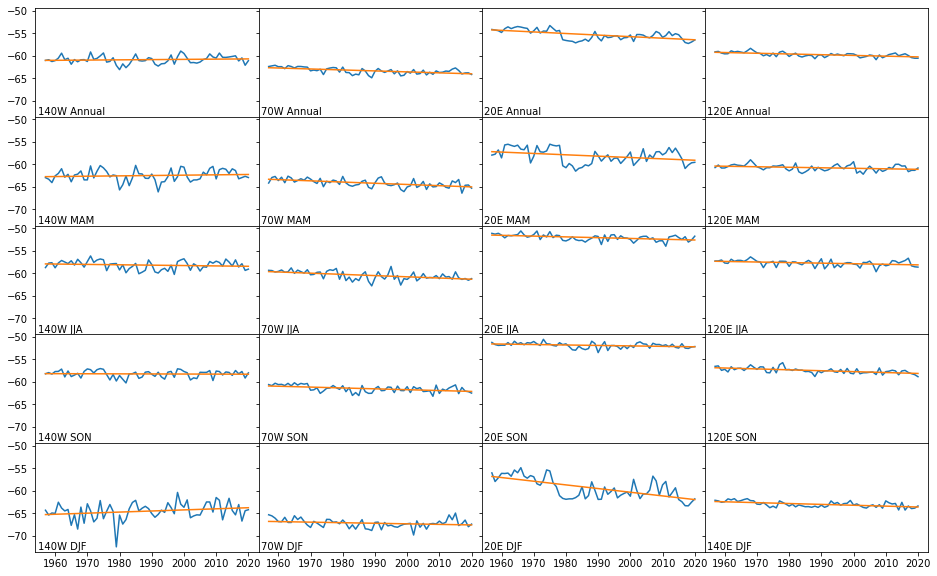

In [13]:
#################
# Plot iso0 retreat linear regression
#################
#Figure and axis
fig, ((ax1, ax2, ax3, ax4), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20),  (ax5, ax6, ax7, ax8))  = plt.subplots(5, 4, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(16,10), facecolor='white')

##Plot
#140W
ix = np.where(lons == -140)
ax1.plot(years[7:], lat0_ANN[7:,ix].flatten(), '-')
ax1.plot(years[7:], intercept_ANN[ix] + slope_ANN[ix]*years[7:])
ax5.plot(years[7:], lat0_DJF[7:,ix].flatten(), '-')
ax5.plot(years[7:], intercept_DJF[ix] + slope_DJF[ix]*years[7:])
ax9.plot(years[7:], lat0_MAM[7:,ix].flatten(), '-')
ax9.plot(years[7:], intercept_MAM[ix] + slope_MAM[ix]*years[7:])
ax13.plot(years[7:], lat0_JJA[7:,ix].flatten(), '-')
ax13.plot(years[7:], intercept_JJA[ix] + slope_JJA[ix]*years[7:])
ax17.plot(years[7:], lat0_SON[7:,ix].flatten(), '-')
ax17.plot(years[7:], intercept_SON[ix] + slope_SON[ix]*years[7:])

#70W
ix = np.where(lons == -70)
ax2.plot(years[7:], lat0_ANN[7:,ix].flatten(), '-')
ax2.plot(years[7:], intercept_ANN[ix] + slope_ANN[ix]*years[7:])
ax6.plot(years[7:], lat0_DJF[7:,ix].flatten(), '-')
ax6.plot(years[7:], intercept_DJF[ix] + slope_DJF[ix]*years[7:])
ax10.plot(years[7:], lat0_MAM[7:,ix].flatten(), '-')
ax10.plot(years[7:], intercept_MAM[ix] + slope_MAM[ix]*years[7:])
ax14.plot(years[7:], lat0_JJA[7:,ix].flatten(), '-')
ax14.plot(years[7:], intercept_JJA[ix] + slope_JJA[ix]*years[7:])
ax18.plot(years[7:], lat0_SON[7:,ix].flatten(), '-')
ax18.plot(years[7:], intercept_SON[ix] + slope_SON[ix]*years[7:])

#20E
ix = np.where(lons == 20)
ax3.plot(years[7:], lat0_ANN[7:,ix].flatten(), '-')
ax3.plot(years[7:], intercept_ANN[ix] + slope_ANN[ix]*years[7:])
ax7.plot(years[7:], lat0_DJF[7:,ix].flatten(), '-')
ax7.plot(years[7:], intercept_DJF[ix] + slope_DJF[ix]*years[7:])
ax11.plot(years[7:], lat0_MAM[7:,ix].flatten(), '-')
ax11.plot(years[7:], intercept_MAM[ix] + slope_MAM[ix]*years[7:])
ax15.plot(years[7:], lat0_JJA[7:,ix].flatten(), '-')
ax15.plot(years[7:], intercept_JJA[ix] + slope_JJA[ix]*years[7:])
ax19.plot(years[7:], lat0_SON[7:,ix].flatten(), '-')
ax19.plot(years[7:], intercept_SON[ix] + slope_SON[ix]*years[7:])

#120E
ix = np.where(lons == 120)
ax4.plot(years[7:], lat0_ANN[7:,ix].flatten(), '-')
ax4.plot(years[7:], intercept_ANN[ix] + slope_ANN[ix]*years[7:])
ax8.plot(years[7:], lat0_DJF[7:,ix].flatten(), '-')
ax8.plot(years[7:], intercept_DJF[ix] + slope_DJF[ix]*years[7:])
ax12.plot(years[7:], lat0_MAM[7:,ix].flatten(), '-')
ax12.plot(years[7:], intercept_MAM[ix] + slope_MAM[ix]*years[7:])
ax16.plot(years[7:], lat0_JJA[7:,ix].flatten(), '-')
ax16.plot(years[7:], intercept_JJA[ix] + slope_JJA[ix]*years[7:])
ax20.plot(years[7:], lat0_SON[7:,ix].flatten(), '-')
ax20.plot(years[7:], intercept_SON[ix] + slope_SON[ix]*years[7:])

#titles
ax1.annotate('140W Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax2.annotate('70W Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax3.annotate('20E Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax4.annotate('120E Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax5.annotate('140W DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax6.annotate('70W DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax7.annotate('20E DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax8.annotate('140E DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax9.annotate('140W MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax10.annotate('70W MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax11.annotate('20E MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax12.annotate('120E MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax13.annotate('140W JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax14.annotate('70W JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax15.annotate('20E JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax16.annotate('120E JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax17.annotate('140W SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax18.annotate('70W SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax19.annotate('20E SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax20.annotate('120E SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)

plt.show()

Text(0.01, 0.02, 'Weddell SON')

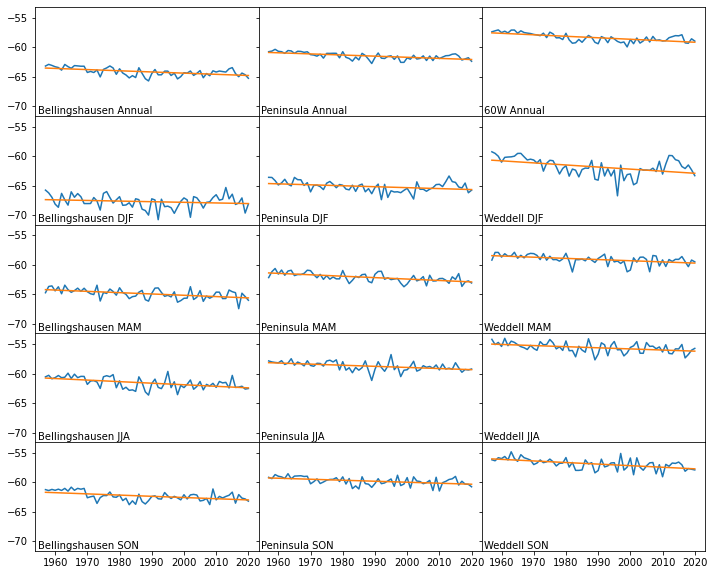

In [14]:
#################
# Plot iso0 retreat linear regression by SECTOR
#################

#Figure and axis
fig, ((ax1, ax2, ax3), (ax5, ax6, ax7), (ax9, ax10, ax11), (ax13, ax14, ax15), (ax17, ax18, ax19))  = plt.subplots(5, 3, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(12,10), facecolor='white')
#fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), (ax17, ax18, ax19, ax20))  = plt.subplots(5, 4, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(16,10), facecolor='white')

##Plot
#Bellingshausen
ax1.plot(years[7:], np.mean(lat0_ANN[7:,380:440],1), '-')
ax1.plot(years[7:], np.mean(intercept_ANN[380:440]) + np.mean(slope_ANN[380:440])*years[7:])
ax5.plot(years[7:], np.mean(lat0_DJF[7:,380:440],1), '-')
ax5.plot(years[7:], np.mean(intercept_DJF[380:440]) + np.mean(slope_DJF[380:440])*years[7:])
ax9.plot(years[7:], np.mean(lat0_MAM[7:,380:440],1), '-')
ax9.plot(years[7:], np.mean(intercept_MAM[380:440]) + np.mean(slope_MAM[380:440])*years[7:])
ax13.plot(years[7:], np.mean(lat0_JJA[7:,380:440],1), '-')
ax13.plot(years[7:], np.mean(intercept_JJA[380:440]) + np.mean(slope_JJA[380:440])*years[7:])
ax17.plot(years[7:], np.mean(lat0_SON[7:,380:440],1), '-')
ax17.plot(years[7:], np.mean(intercept_SON[380:440]) + np.mean(slope_SON[380:440])*years[7:])

#AP
ax2.plot(years[7:], np.mean(lat0_ANN[7:,440:500],1), '-')
ax2.plot(years[7:], np.mean(intercept_ANN[440:500]) + np.mean(slope_ANN[440:500])*years[7:])
ax6.plot(years[7:], np.mean(lat0_DJF[7:,440:500],1), '-')
ax6.plot(years[7:], np.mean(intercept_DJF[440:500]) + np.mean(slope_DJF[440:500])*years[7:])
ax10.plot(years[7:], np.mean(lat0_MAM[7:,440:500],1), '-')
ax10.plot(years[7:], np.mean(intercept_MAM[440:500]) + np.mean(slope_MAM[440:500])*years[7:])
ax14.plot(years[7:], np.mean(lat0_JJA[7:,440:500],1), '-')
ax14.plot(years[7:], np.mean(intercept_JJA[440:500]) + np.mean(slope_JJA[440:500])*years[7:])
ax18.plot(years[7:], np.mean(lat0_SON[7:,440:500],1), '-')
ax18.plot(years[7:], np.mean(intercept_SON[440:500]) + np.mean(slope_SON[440:500])*years[7:])

#Wedell
ax3.plot(years[7:], np.mean(lat0_ANN[7:,500:560],1), '-')
ax3.plot(years[7:], np.mean(intercept_ANN[500:560]) + np.mean(slope_ANN[500:560])*years[7:])
ax7.plot(years[7:], np.mean(lat0_DJF[7:,500:560],1), '-')
ax7.plot(years[7:], np.mean(intercept_DJF[500:560]) + np.mean(slope_DJF[500:560])*years[7:])
ax11.plot(years[7:], np.mean(lat0_MAM[7:,500:560],1), '-')
ax11.plot(years[7:], np.mean(intercept_MAM[500:560]) + np.mean(slope_MAM[500:560])*years[7:])
ax15.plot(years[7:], np.mean(lat0_JJA[7:,500:560],1), '-')
ax15.plot(years[7:], np.mean(intercept_JJA[500:560]) + np.mean(slope_JJA[500:560])*years[7:])
ax19.plot(years[7:], np.mean(lat0_SON[7:,500:560],1), '-')
ax19.plot(years[7:], np.mean(intercept_SON[500:560]) + np.mean(slope_SON[500:560])*years[7:])

#titles
ax1.annotate('Bellingshausen Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax2.annotate('Peninsula Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax3.annotate('60W Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax5.annotate('Bellingshausen DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax6.annotate('Peninsula DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax7.annotate('Weddell DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax9.annotate('Bellingshausen MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax10.annotate('Peninsula MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax11.annotate('Weddell MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax13.annotate('Bellingshausen JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax14.annotate('Peninsula JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax15.annotate('Weddell JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax17.annotate('Bellingshausen SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax18.annotate('Peninsula SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax19.annotate('Weddell SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)

Text(0.01, 0.02, 'Peninsula SON')

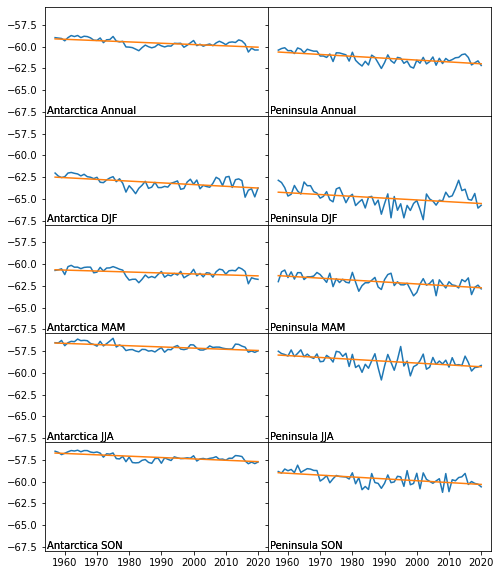

In [15]:
#################
# Plot iso0 retreat linear regression by SECTOR
#################

#Figure and axis
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10))  = plt.subplots(5, 2, sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(8,10), facecolor='white')

##Plot
#Antarctica
ax1.plot(years[7:], np.mean(lat0_ANN[7:,:],1), '-')
ax1.plot(years[7:], np.mean(intercept_ANN[:]) + np.mean(slope_ANN[:])*years[7:])
ax3.plot(years[7:], np.mean(lat0_DJF[7:,:],1), '-')
ax3.plot(years[7:], np.mean(intercept_DJF[:]) + np.mean(slope_DJF[:])*years[7:])
ax5.plot(years[7:], np.mean(lat0_MAM[7:,:],1), '-')
ax5.plot(years[7:], np.mean(intercept_MAM[:]) + np.mean(slope_MAM[:])*years[7:])
ax7.plot(years[7:], np.mean(lat0_JJA[7:,:],1), '-')
ax7.plot(years[7:], np.mean(intercept_JJA[:]) + np.mean(slope_JJA[:])*years[7:])
ax9.plot(years[7:], np.mean(lat0_SON[7:,:],1), '-')
ax9.plot(years[7:], np.mean(intercept_SON[:]) + np.mean(slope_SON[:])*years[7:])

#Peninsula
ax2.plot(years[7:], np.mean(lat0_ANN[7:,380:560],1), '-')
ax2.plot(years[7:], np.mean(intercept_ANN[380:560]) + np.mean(slope_ANN[380:560])*years[7:])
ax4.plot(years[7:], np.mean(lat0_DJF[7:,380:560],1), '-')
ax4.plot(years[7:], np.mean(intercept_DJF[380:560]) + np.mean(slope_DJF[380:560])*years[7:])
ax6.plot(years[7:], np.mean(lat0_MAM[7:,380:560],1), '-')
ax6.plot(years[7:], np.mean(intercept_MAM[380:560]) + np.mean(slope_MAM[380:560])*years[7:])
ax8.plot(years[7:], np.mean(lat0_JJA[7:,380:560],1), '-')
ax8.plot(years[7:], np.mean(intercept_JJA[380:560]) + np.mean(slope_JJA[380:560])*years[7:])
ax10.plot(years[7:], np.mean(lat0_SON[7:,380:560],1), '-')
ax10.plot(years[7:], np.mean(intercept_SON[380:560]) + np.mean(slope_SON[380:560])*years[7:])

#print r2
ax1.annotate('Antarctica Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax2.annotate('Peninsula Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax3.annotate('Antarctica DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax4.annotate('Peninsula DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax5.annotate('Antarctica MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax6.annotate('Peninsula MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax7.annotate('Antarctica JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax8.annotate('Peninsula JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax9.annotate('Antarctica SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax10.annotate('Peninsula SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)

#titles
ax1.annotate('Antarctica Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax2.annotate('Peninsula Annual', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax3.annotate('Antarctica DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax4.annotate('Peninsula DJF', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax5.annotate('Antarctica MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax6.annotate('Peninsula MAM', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax7.annotate('Antarctica JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax8.annotate('Peninsula JJA', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax9.annotate('Antarctica SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax10.annotate('Peninsula SON', xy=(.01, .02), xycoords='axes fraction', zorder=2)

Text(0.01, 0.02, 'Antarctic Peninsula')

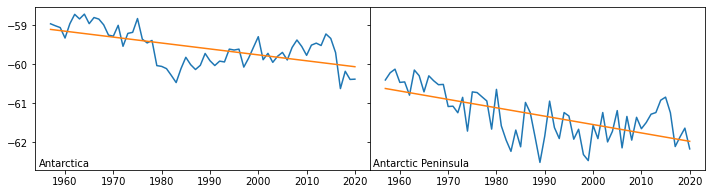

In [16]:
#################
# Plot iso0 retreat linear regression by SECTOR
#################

#Figure and axis
fig, ((ax1, ax2))  = plt.subplots(1, 2, sharex=True, sharey=True, gridspec_kw={'hspace': .2, 'wspace': 0}, figsize=(12,3), facecolor='white')

##Plot
#Antarctica
ax1.plot(years[7:], np.mean(lat0_ANN[7:,:],1), '-')
ax1.plot(years[7:], np.mean(intercept_ANN[:]) + np.mean(slope_ANN[:])*years[7:])

#Peninsula
ax2.plot(years[7:], np.mean(lat0_ANN[7:,380:560],1), '-')
ax2.plot(years[7:], np.mean(intercept_ANN[380:560]) + np.mean(slope_ANN[380:560])*years[7:])

#titles
ax1.annotate('Antarctica', xy=(.01, .02), xycoords='axes fraction', zorder=2)
ax2.annotate('Antarctic Peninsula', xy=(.01, .02), xycoords='axes fraction', zorder=2)


In [17]:
#Save files ZIL
np.savetxt('ZIL_1957-2020_ANN_Ant_timeseries.csv',np.mean(lat0_ANN[7:,:],1))
np.savetxt('ZIL_1957-2020_DJF_Ant_timeseries.csv',np.mean(lat0_DJF[7:,:],1))
np.savetxt('ZIL_1957-2020_MAM_Ant_timeseries.csv',np.mean(lat0_MAM[7:,:],1))
np.savetxt('ZIL_1957-2020_JJA_Ant_timeseries.csv',np.mean(lat0_JJA[7:,:],1))
np.savetxt('ZIL_1957-2020_SON_Ant_timeseries.csv',np.mean(lat0_SON[7:,:],1))

np.savetxt('ZIL_1957-2020_ANN_AP_timeseries.csv',np.mean(lat0_ANN[7:,380:560],1))
np.savetxt('ZIL_1957-2020_DJF_AP_timeseries.csv',np.mean(lat0_DJF[7:,380:560],1))
np.savetxt('ZIL_1957-2020_MAM_AP_timeseries.csv',np.mean(lat0_MAM[7:,380:560],1))
np.savetxt('ZIL_1957-2020_JJA_AP_timeseries.csv',np.mean(lat0_JJA[7:,380:560],1))
np.savetxt('ZIL_1957-2020_SON_AP_timeseries.csv',np.mean(lat0_SON[7:,380:560],1))

In [18]:
#Load data
print('ANT')
print('ANN')
ZIL_ANN = np.loadtxt('ZIL_1957-2020_ANN_Ant_timeseries.csv')
slope_ANN, intercept_ANN, r_value_ANN, p_value_ANN, std_err_ANN = stats.linregress(years[7:], ZIL_ANN)
print(slope_ANN*10*111)
print(p_value_ANN)

print('MAM')
ZIL_MAM = np.loadtxt('ZIL_1957-2020_MAM_Ant_timeseries.csv')
slope_MAM, intercept_MAM, r_value_MAM, p_value_MAM, std_err_MAM = stats.linregress(years[7:], ZIL_MAM)
print(slope_MAM*10*111)
print(p_value_MAM)

print('JJA')
ZIL_JJA = np.loadtxt('ZIL_1957-2020_JJA_Ant_timeseries.csv')
slope_JJA, intercept_JJA, r_value_JJA, p_value_JJA, std_err_JJA = stats.linregress(years[7:], ZIL_JJA)
print(slope_JJA*10*111)
print(p_value_JJA)

print('SON')
ZIL_SON = np.loadtxt('ZIL_1957-2020_SON_Ant_timeseries.csv')
slope_SON, intercept_SON, r_value_SON, p_value_SON, std_err_SON = stats.linregress(years[7:], ZIL_SON)
print(slope_SON*10*111)
print(p_value_SON)

print('DJF')
ZIL_DJF = np.loadtxt('ZIL_1957-2020_DJF_Ant_timeseries.csv')
slope_DJF, intercept_DJF, r_value_DJF, p_value_DJF, std_err_DJF = stats.linregress(years[7:], ZIL_DJF)
print(slope_DJF*10*111)
print(p_value_DJF)


#Load data
print('AP')
print('ANN')
ZIL_ANN = np.loadtxt('ZIL_1957-2020_ANN_AP_timeseries.csv')
slope_ANN, intercept_ANN, r_value_ANN, p_value_ANN, std_err_ANN = stats.linregress(years[7:], ZIL_ANN)
print(slope_ANN*10*111)
print(p_value_ANN)

print('MAM')
ZIL_MAM = np.loadtxt('ZIL_1957-2020_MAM_AP_timeseries.csv')
slope_MAM, intercept_MAM, r_value_MAM, p_value_MAM, std_err_MAM = stats.linregress(years[7:], ZIL_MAM)
print(slope_MAM*10*111)
print(p_value_MAM)

print('JJA')
ZIL_JJA = np.loadtxt('ZIL_1957-2020_JJA_AP_timeseries.csv')
slope_JJA, intercept_JJA, r_value_JJA, p_value_JJA, std_err_JJA = stats.linregress(years[7:], ZIL_JJA)
print(slope_JJA*10*111)
print(p_value_JJA)

print('SON')
ZIL_SON = np.loadtxt('ZIL_1957-2020_SON_AP_timeseries.csv')
slope_SON, intercept_SON, r_value_SON, p_value_SON, std_err_SON = stats.linregress(years[7:], ZIL_SON)
print(slope_SON*10*111)
print(p_value_SON)

print('DJF')
ZIL_DJF = np.loadtxt('ZIL_1957-2020_DJF_AP_timeseries.csv')
slope_DJF, intercept_DJF, r_value_DJF, p_value_DJF, std_err_DJF = stats.linregress(years[7:], ZIL_DJF)
print(slope_DJF*10*111)
print(p_value_DJF)

ANT
ANN
-16.800624916376986
2.4283055050069144e-07
MAM
-12.286381367576654
0.0010522797960082274
JJA
-15.12315069382688
2.0244694330653979e-07
SON
-17.368219880830672
4.0294690304889135e-09
DJF
-22.06305216629813
3.0877988563806587e-06
AP
ANN
-23.79399191784523
2.130201038803538e-08
MAM
-24.552363136881436
3.0625129906745133e-07
JJA
-23.730510010071377
1.842284038665574e-05
SON
-23.769507802504418
3.667964451249671e-06
DJF
-22.919294290376886
0.0022924228192386406
